In [1]:
import numpy as np

In [78]:
x1 = np.random.rand(3, 5) + [0,0,1,1,0]


In [79]:
x1 = x1 / 2

In [80]:

def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # n x 1
    order = scores.argsort()[::-1] # n x 1

    keep = []
    while order.size > 0:
        i = order[0]
        keep.append(i)
        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.minimum(x2[i], x2[order[1:]])
        yy2 = np.minimum(y2[i], y2[order[1:]])

        w = np.maximum(0.0, xx2 - xx1 + 1) 
        h = np.maximum(0.0, yy2 - yy1 + 1)
        inter = w * h
        ovr = inter / (areas[i] + areas[order[1:]] - inter)

        inds = np.where(ovr <= thresh)[0]
        order = order[inds + 1]

    return keep


py_cpu_nms(x1, 0.5)



[1]

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle


0.453435992432 0.394186662727 0.884202920665 0.799248241514
0.361519009915 0.208309124725 0.613405197723 0.727113670459
0.468327974482 0.478018092286 0.696047157829 0.854162335496


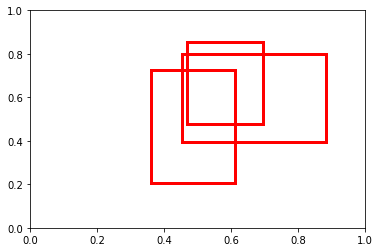

In [82]:
for i in range(x1.shape[0]):
    a,b,c,d,e = x1[i]
    print a, b, c, d

    plt.gca().add_patch(
                plt.Rectangle((a,b),c - a,d - b, facecolor = 'red', fill = False,
                              edgecolor='r', linewidth=3)
                )
plt.show()

0.361519009915 0.208309124725 0.613405197723 0.727113670459


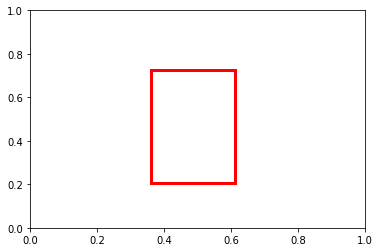

In [83]:
a,b,c,d,e = x1[1]
print a, b, c, d

plt.gca().add_patch(
            plt.Rectangle((a,b),c - a,d - b, facecolor = 'red', fill = False,
                          edgecolor='r', linewidth=3)
            )
plt.show()